<a href="https://colab.research.google.com/github/dunliangyang2010/Deep-Learning-practice/blob/master/Explainable%20AI_tSNE_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(keras.optimizers.Adam(), 
              keras.losses.categorical_crossentropy, 
              metrics=[keras.metrics.categorical_accuracy])

In [ ]:
model.fit(x_train, y_train, 
          epochs=5, 
          batch_size=128)

Epoch 1/5
469/469 [==============================] - 15s 12ms/step - loss: 0.4100 - categorical_accuracy: 0.9126
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0655 - categorical_accuracy: 0.9801
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0468 - categorical_accuracy: 0.9854
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0338 - categorical_accuracy: 0.9895
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0283 - categorical_accuracy: 0.9908


In [ ]:
model2 = keras.models.Model(model.inputs, 
                            model.layers[-2].output)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        9248      
                                                             

In [ ]:
x_train_features = model2.predict(x_train)

In [ ]:
y_train_raw = np.argmax(y_train, axis=-1)

In [ ]:
x_train_features.shape, y_train_raw.shape

((60000, 1568), (60000,))

In [ ]:
N_SAMPLES = 2000

In [ ]:
x_tsne = manifold.TSNE(n_components=2, 
                       init='random', 
                       random_state=5566, 
                       verbose=1).fit_transform(x_train_features[:N_SAMPLES])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.465s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 24.616703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.013046
[t-SNE] KL divergence after 1000 iterations: 0.857918


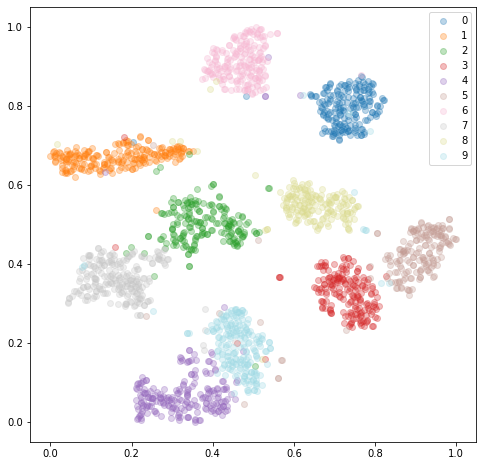

In [ ]:
# normalize
x_min, x_max = x_tsne.min(0), x_tsne.max(0)
x_norm = (x_tsne - x_min) / (x_max - x_min)

plt.figure(figsize=(8, 8))
cmap = plt.cm.get_cmap("tab20", 10)

for digit in range(10):
    idx = y_train_raw[:N_SAMPLES] == digit
    plt.scatter(x_norm[idx, 0], 
                x_norm[idx, 1], 
                color=cmap(digit), 
                label=digit, 
                alpha=0.3)

plt.legend()
plt.show()